### IMPORT LIBRARY

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sounddevice as sd
import pandas as pd
from scipy.io.wavfile import write

### CREATE SINUSOID SIGNALS

In [21]:
samplingFreq = 10000    # sampled at 10 kHz = 10000 sampel/s
tlims = [0,3]          # time duration in second (s)
signalFreq = 50        # signal frequency in Hz
signalMag = 1           # signal magnitude
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)     # generate time array
y = signalMag*np.sin(2*math.pi*signalFreq*t)                            # generate sinusoid signal with eq. A.cos(2.phi.freq.time)

### PLOT THE SIGNALS

<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\h'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21268\4247145492.py:17: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$\omega$ (cycles/s)")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21268\4247145492.py:18: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$|\hat{y}|$")


Text(0, 0.5, '$|\\hat{y}|$')

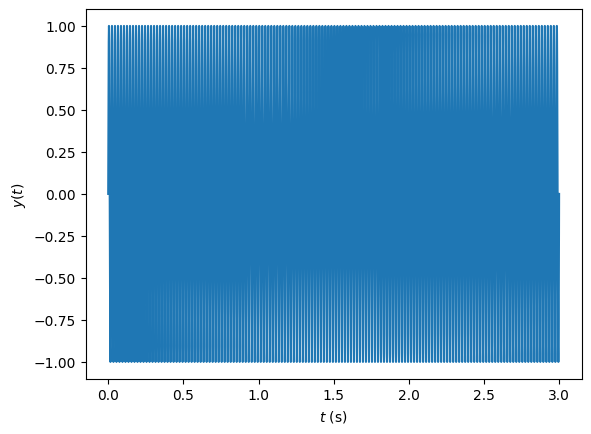

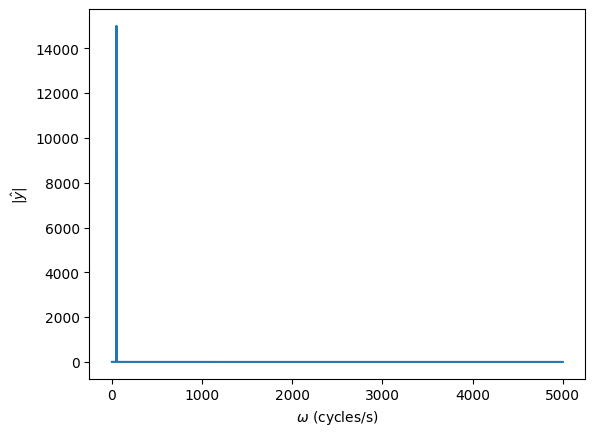

In [24]:
# Plot signal in time domain
plt.figure()
# plt.plot(t[2000:3000],y[2000:3000])                             # check only for 0.1 second (for visibility reason)
plt.plot(t,y)
# plt.xlim([min(t),max(t)])
plt.ylabel("$y(t)$")
plt.xlabel("$t$ (s)")

# Calculate fourier transformation
yhat = np.fft.fft(y)
fcycles = np.fft.fftfreq(len(t), d=1.0/samplingFreq)            # frequency in rad/s

# Plot signal in frequency domain (Power spectrum)
plt.figure()
plt.plot(fcycles[:len(fcycles)//2],np.absolute(yhat[:len(fcycles)//2]))
# plt.xlim([-100,100])
plt.xlabel("$\omega$ (cycles/s)")
plt.ylabel("$|\hat{y}|$")

### PLAY THE GENERATED SIGNAL AS SOUND

In [3]:
# Play the wave as sound
sd.play(y, samplerate=samplingFreq)  # Play the signal
sd.wait()  # Wait until playback finishes

print("Playback complete.")

Playback complete.


### SAVE THE GENERATED SOUND AS WAV

In [23]:
# Save as WAV file
output_filename = "generated_sinusoid_sound.wav"
scaled_y = (y * 32767).astype(np.int16)  # Scale to 16-bit PCM format
write(output_filename, samplingFreq, scaled_y)
print(f"Audio saved as {output_filename}")

Audio saved as generated_sinusoid_sound.wav
